In [1]:
import matplotlib.pyplot as plt
import numpy as np
import illustris_python.groupcat as gc
%matplotlib inline

In [2]:
hubble = 0.704

In [3]:
basePath = "/global/project/projectdirs/desi/users/forero/Illustris-1/"

In [4]:
subhalo_fields = ['SubhaloMass','SubhaloSFRinRad', 'SubhaloPos', 
                  'SubhaloVel', 'SubhaloParent', 'SubhaloGrNr', 'SubhaloStellarPhotometrics']
subhalos = gc.loadSubhalos(basePath,135,fields=subhalo_fields)
photo = {'U':0, 'B':1, 'V':2, 'K':3, 'g':4, 'r':5, 'i':6, 'z':7}

In [5]:
halo_fields = ['GroupFirstSub', 'Group_M_Crit200', 'Group_R_Crit200', 'Group_M_TopHat200','Group_M_Mean200',
               'GroupNsubs', 'GroupPos', 'GroupVel', 'GroupFirstSub']
halos = gc.loadHalos(basePath, 135, fields=halo_fields)

In [6]:
n_halos = len(halos['GroupNsubs'])
print(n_halos)

7713601


In [73]:
K_mags = subhalos['SubhaloStellarPhotometrics'][:,photo['K']]
K_cut = -14.0
K_selection = K_mags<K_cut
K_star = -23.55
print(np.count_nonzero(K_selection), K_mags.min())


170952 -28.2147


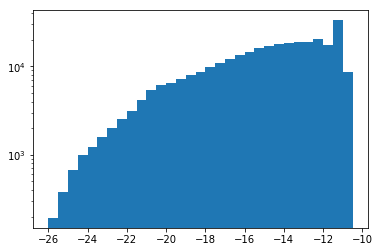

In [74]:
l = plt.hist(K_mags, bins=np.arange(-26,-10,0.5), log=True)

In [75]:
pos_in = subhalos['SubhaloPos'][K_selection]
vel_in = subhalos['SubhaloVel'][K_selection]
mags_in = subhalos['SubhaloStellarPhotometrics'][K_selection]
parent_in =subhalos['SubhaloGrNr'][K_selection]
K_mags_in = mags_in[:,photo['K']]

In [76]:
n_in = len(pos_in)
print(n_in)
K_select_center = np.where((K_mags_in>K_star-0.01) & (K_mags_in<K_star+0.01))
K_select_center = K_select_center[0]
center_id = K_select_center[12]

170952


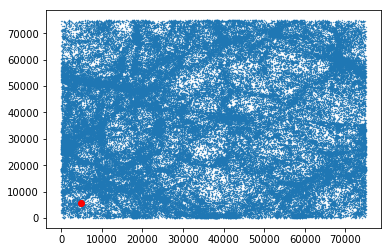

In [77]:
plt.scatter(pos_in[:,0], pos_in[:,1], s=0.1)
plt.scatter(pos_in[center_id,0], pos_in[center_id,1], color='red')

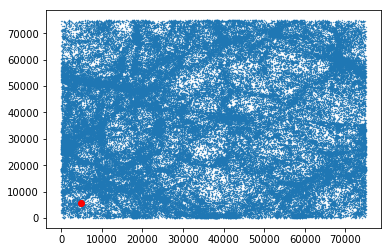

In [78]:
plt.scatter(pos_in[:,0], pos_in[:,1], s=0.1)
plt.scatter(pos_in[center_id,0], pos_in[center_id,1], color='red')

In [79]:
lbox = 75000.0
pos_center = pos_in[center_id]
vel_center = vel_in[center_id]
centered_pos = (pos_in - pos_center)
centered_vel = (vel_in - vel_center)

off_x = np.where(centered_pos[:,0] >= lbox/2.0)
off_x = off_x[0]
if len(off_x)>1:
    centered_pos[off_x,0] = centered_pos[off_x,0] - lbox
else:
    off_x = np.where(centered_pos[:,0] <= -lbox/2.0)
    off_x = off_x[0]
    centered_pos[off_x,0] = centered_pos[off_x,0] + lbox

    
off_y = np.where(centered_pos[:,1] >= lbox/2.0)
off_y = off_y[0]
if len(off_y)>1:
    centered_pos[off_y,1] = centered_pos[off_y,1] - lbox
else:
    off_y = np.where(centered_pos[:,1] <= -lbox/2.0)
    off_y = off_y[0]
    centered_pos[off_y,1] = centered_pos[off_y,1] + lbox

off_z = np.where(centered_pos[:,2] >= lbox/2.0)
off_z = off_z[0]
if len(off_z)>1:
    centered_pos[off_z,2] = centered_pos[off_z,2] - lbox
else:
    off_z = np.where(centered_pos[:,2] <= -lbox/2.0)
    off_z = off_z[0]
    centered_pos[off_z,2] = centered_pos[off_z,2] + lbox

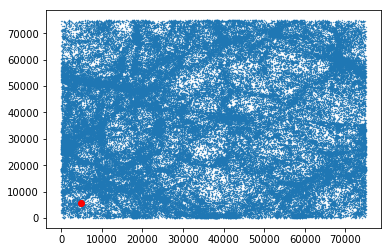

In [80]:
plt.scatter(pos_in[:,0], pos_in[:,1], s=0.1)
plt.scatter(pos_in[center_id,0], pos_in[center_id,1], color='red')

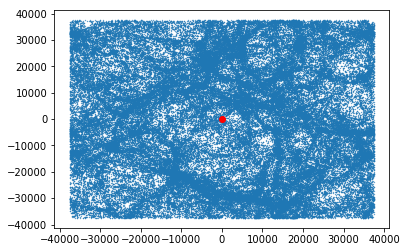

In [81]:
plt.scatter(centered_pos[:,0], centered_pos[:,1], s=0.1)
plt.scatter(centered_pos[center_id,0], centered_pos[center_id,1], color='red')


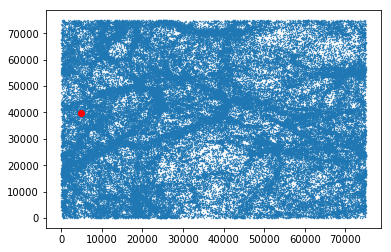

In [82]:
plt.scatter(pos_in[:,0], pos_in[:,2], s=0.1)
plt.scatter(pos_in[center_id,0], pos_in[center_id,2], color='red')

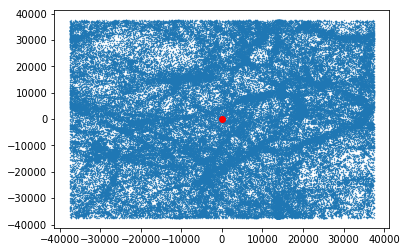

In [83]:
plt.scatter(centered_pos[:,0], centered_pos[:,2], s=0.1)
plt.scatter(centered_pos[center_id,0], centered_pos[center_id,2], color='red')

In [84]:
r = np.sqrt(centered_pos[:,0]**2 + centered_pos[:,1]**2 + centered_pos[:,2]**2)

theta = np.arccos(centered_pos[:,2]/r)
phi = np.arccos(centered_pos[:,0]/np.abs(r*np.sin(theta)))

q_3 = (centered_pos[:,0]<0) &(centered_pos[:,1]<0)
phi[q_3] = 2.0*np.pi - phi[q_3]
q_4 = (centered_pos[:,0]>0) &(centered_pos[:,1]<0)
phi[q_4] = 2.0*np.pi - phi[q_4]

/global/common/cori/contrib/desi/desiconda/20170613-1.1.4-spectro/code/desiconda/20170613-1.1.4-spectro_conda/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
/global/common/cori/contrib/desi/desiconda/20170613-1.1.4-spectro/code/desiconda/20170613-1.1.4-spectro_conda/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in arccos


In [85]:
dec = np.rad2deg(np.pi/2.0 - theta)
ra = np.rad2deg(phi)

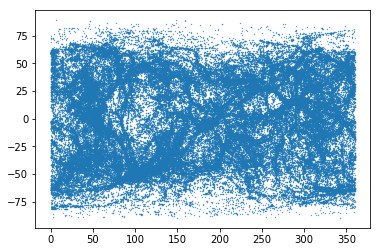

In [86]:
plt.scatter(ra,dec, s=0.1)

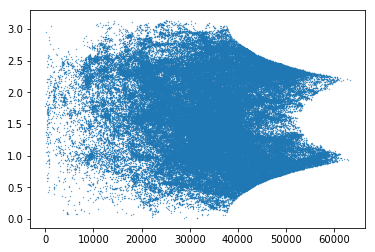

In [87]:
plt.scatter(r, theta, s=0.1)

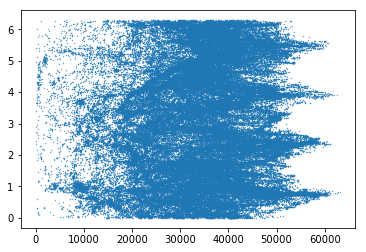

In [88]:
plt.scatter(r, phi, s=0.1)

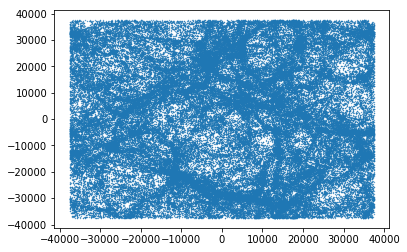

In [89]:
plt.scatter(r*np.cos(phi)*np.sin(theta), r*np.sin(phi)*np.sin(theta), s=0.1)

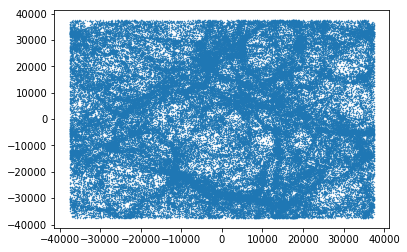

In [90]:
plt.scatter(centered_pos[:,0], centered_pos[:,1], s=0.1)

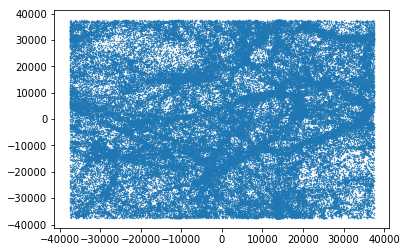

In [91]:
plt.scatter(r*np.cos(phi)*np.sin(theta), r*np.cos(theta), s=0.1)

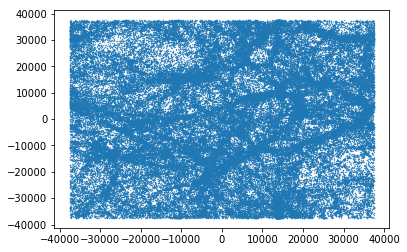

In [92]:
plt.scatter(centered_pos[:,0], centered_pos[:,2], s=0.1)


In [93]:
unit_pos = centered_pos.copy()
norm_pos = np.sqrt(centered_pos[:,0]**2+centered_pos[:,1]**2 + centered_pos[:,2]**2) + 1
unit_pos[:,0] = centered_pos[:,0]/norm_pos
unit_pos[:,1] = centered_pos[:,1]/norm_pos
unit_pos[:,2] = centered_pos[:,2]/norm_pos

In [94]:
rad_vel = (r/1000.0)*100.0 + np.dot(centered_vel,unit_pos.T)[:,0] 

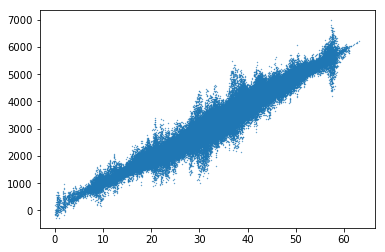

In [95]:
plt.scatter(r/1000.0, rad_vel, s=0.1)

In [96]:
selected  = (rad_vel < 3500.0) 
print(np.shape(mags_in))

A = np.array([parent_in[selected], r[selected]/hubble,rad_vel[selected],ra[selected], dec[selected], 
            mags_in[selected,photo['B']], mags_in[selected,photo['K']]])
galfilename = '/global/homes/f/forero/IllustrisGroups/data/simple_mock{}.dat'.format(K_cut)
print(galfilename)
np.savetxt(galfilename, A.T, 
           fmt="%d %f %f %f %f %f %f", 
               header='group_id d_radial[kpc] v_radial[km/s] RA Dec MAG_B MAG_K')

(170952, 8)
/global/homes/f/forero/IllustrisGroups/data/simple_mock-14.0.dat


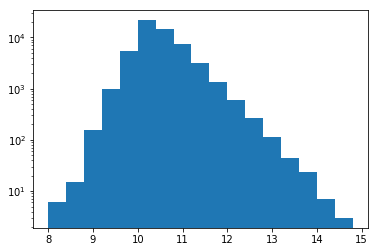

In [97]:
selected_gr_nr = np.unique(parent_in[selected])
FOF_group_mass = halos['Group_M_TopHat200'][selected_gr_nr]*1E10/hubble + 1E8
l = plt.hist(np.log10(FOF_group_mass), bins=np.arange(8,15,0.4),log=True)
halo_data = np.array([selected_gr_nr, FOF_group_mass])
halofilename = '/global/homes/f/forero/IllustrisGroups/data/halos_simple_mock{}.dat'.format(K_cut)
np.savetxt(halofilename, halo_data.T, 
           fmt="%d %e", 
               header='group_id HaloMass [Msun]')

In [98]:
!head -n20 $galfilename

# group_id d_radial[kpc] v_radial[km/s] RA Dec MAG_B MAG_K
0 42370.507812 2774.957764 100.626915 -45.663139 -24.448215 -28.214746
0 42534.277344 2909.414307 103.659851 -49.539627 -22.611546 -26.499897
0 44033.238281 1950.650757 100.819580 -46.419022 -22.065178 -25.958813
0 42695.828125 1642.343994 99.771507 -45.593716 -22.360985 -26.292606
0 43493.136719 1702.445190 100.284271 -46.207653 -21.868982 -25.814308
0 45609.531250 2758.662354 100.666138 -48.862453 -21.506407 -25.463886
0 41465.441406 3000.822998 98.890343 -43.859352 -21.231735 -25.068266
0 45283.265625 2567.397949 102.277290 -48.366146 -20.734545 -24.474823
0 42289.824219 3173.269287 104.779655 -50.270416 -21.261328 -25.233156
0 42591.132812 1950.841309 100.938339 -45.796764 -21.635118 -25.745955
0 43781.843750 2794.540039 99.101501 -46.598698 -21.359940 -25.236057
0 40584.632812 2562.002441 98.859871 -44.065845 -20.900120 -24.963472
0 43576.148438 1730.980591 99.503654 -45.992805 -21.992264 -25.486944
0 42062.093750 3077.960

In [99]:
!head -n20 $halofilename

# group_id HaloMass [Msun]
0 3.178030e+14
1 3.625026e+14
2 2.794334e+14
3 1.498237e+14
4 2.127853e+14
6 1.880334e+14
7 5.716182e+13
8 1.585334e+14
9 1.612909e+14
10 1.283550e+14
11 1.133934e+14
12 4.144495e+13
13 3.935782e+13
14 9.191169e+13
15 9.187810e+13
16 7.743725e+13
17 8.038132e+13
18 7.639776e+13
19 4.858137e+13


In [100]:
data = np.loadtxt(galfilename)

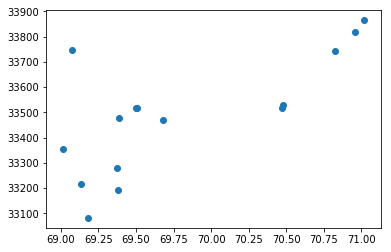

In [101]:
group_id=349
plt.scatter(data[(data[:,0]==group_id),3],data[(data[:,0]==group_id),1])

In [102]:
len(set(data[:,0]))

55682